# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
from glob import glob
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/data'

디즈니	아마존	파라마운트  넷플릭스


In [ ]:
data_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/5. 해커톤/1차 해커톤/processed_data'

# 아마존
amazon_credits_path = os.path.join(data_dir, "amazon_credits.csv")
amazon_titles_path = os.path.join(data_dir, "amazon_titles.csv")
# 넷플릭스
netflix_credits_path = os.path.join(data_dir, "netflix_credits.csv")
netflix_titles_path = os.path.join(data_dir, "netflix_titles.csv")
# 디즈니
disney_credits_path = os.path.join(data_dir, "disney_credits.csv")
disney_titles_path = os.path.join(data_dir, "disney_titles.csv")
# 파라마운트
paramount_credits_path = os.path.join(data_dir, "paramount_credits.csv")
paramount_titles_path = os.path.join(data_dir, "paramount_titles.csv")

In [ ]:
# 아마존
amazon_credits = pd.read_csv(amazon_credits_path)
amazon_titles = pd.read_csv(amazon_titles_path)
# 넷플릭스
netflix_credits = pd.read_csv(netflix_credits_path)
netflix_titles = pd.read_csv(netflix_titles_path)
# 디즈니
disney_credits = pd.read_csv(disney_credits_path)
disney_titles = pd.read_csv(disney_titles_path)
# 파라마운트
paramount_credits = pd.read_csv(paramount_credits_path)
paramount_titles = pd.read_csv(paramount_titles_path)

In [ ]:
credits_list = [amazon_credits, netflix_credits, disney_credits, paramount_credits]
titles_list = [amazon_titles, netflix_titles, disney_titles, paramount_titles]

# 상관관계 분석

<img src='https://drive.google.com/uc?export=download&id=1CQgJbAwPE2QpAAinOKa7yHy97qIri-MG' width="" height ="" /><br>

In [ ]:
imdb_votes_cutline = 500

amazon_imdb_votes = titles_list[0].loc[titles_list[0]["imdb_votes"] >= imdb_votes_cutline]
netflix_imdb_votes = titles_list[1].loc[titles_list[1]["imdb_votes"] >= imdb_votes_cutline]
disney_imdb_votes = titles_list[2].loc[titles_list[2]["imdb_votes"] >= imdb_votes_cutline]
paramount_imdb_votes = titles_list[3].loc[titles_list[3]["imdb_votes"] >= imdb_votes_cutline]

In [ ]:
# 아마존
amazon_imdb_votes["log_scaled_imdb_votes"] = amazon_imdb_votes["imdb_votes"].apply(lambda x: math.log10(x))
amazon_imdb_votes["log_scaled_seasons"] = amazon_imdb_votes["seasons"].apply(lambda x: math.log10(x))
# 넷플릭스
netflix_imdb_votes["log_scaled_imdb_votes"] = netflix_imdb_votes["imdb_votes"].apply(lambda x: math.log10(x))
netflix_imdb_votes["log_scaled_seasons"] = netflix_imdb_votes["seasons"].apply(lambda x: math.log10(x))
# 디즈니
disney_imdb_votes["log_scaled_imdb_votes"] = disney_imdb_votes["imdb_votes"].apply(lambda x: math.log10(x))
disney_imdb_votes["log_scaled_seasons"] = disney_imdb_votes["seasons"].apply(lambda x: math.log10(x))
# 파라마운트
paramount_imdb_votes["log_scaled_imdb_votes"] = paramount_imdb_votes["imdb_votes"].apply(lambda x: math.log10(x))
paramount_imdb_votes["log_scaled_seasons"] = paramount_imdb_votes["seasons"].apply(lambda x: math.log10(x))

In [ ]:
sorted_amazon_titles = amazon_titles["tmdb_popularity"].sort_values(ascending=False)

In [ ]:
amazon_titles["log_scaled_tmdb_popularity"] = amazon_titles["tmdb_popularity"].apply(lambda x: math.log10(1+x))

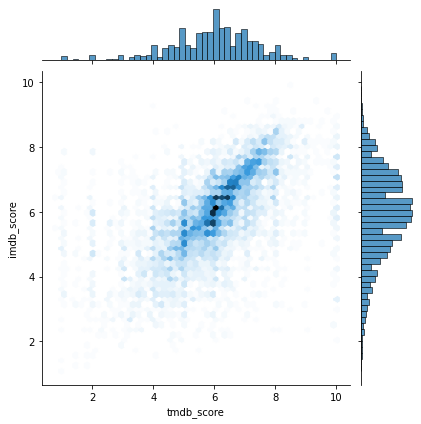

In [ ]:
sns.jointplot(x=amazon_titles["tmdb_score"], y=amazon_titles["imdb_score"], kind='hex')

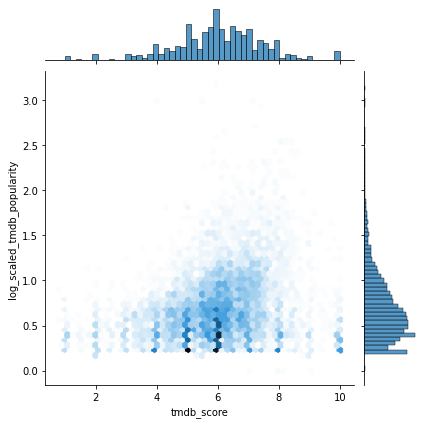

In [ ]:
sns.jointplot(x=amazon_titles["tmdb_score"], y=amazon_titles["log_scaled_tmdb_popularity"], kind='hex')

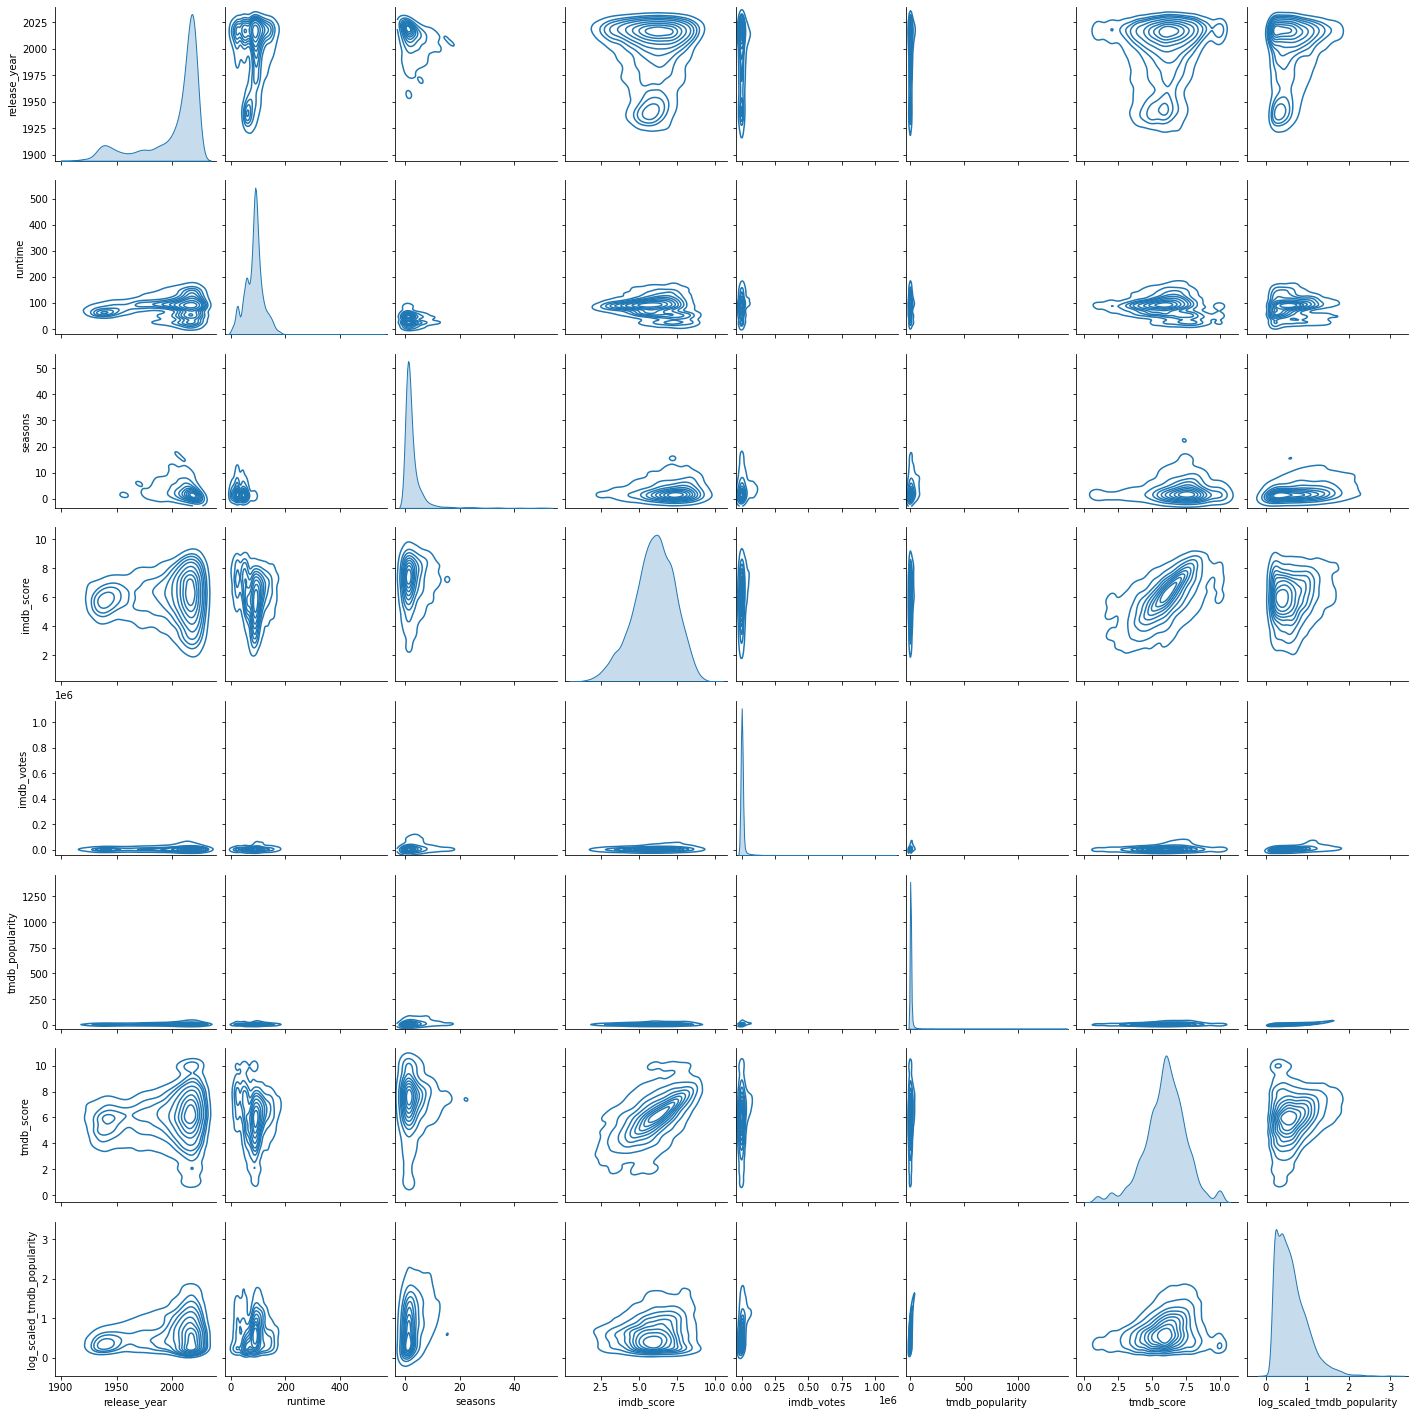

In [ ]:
sns.pairplot(amazon_titles, kind="kde")
plt.show()